In [1]:
import tensorflow as tf
import numpy as np
import progressbar
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from array import array 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
# df=pd.read_csv("BTC-USD.csv")
# df.tail(5)


In [12]:
import yfinance as yf

# stock = yf.Ticker("TATAMOTORS.NS")
hist = yf.download("TATAMOTORS.NS", period="5y")
hist
# hist = stock.history(period="5y")
# hist.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-26,183.899994,184.449997,177.000000,181.750000,181.185303,9865426
2018-11-27,181.699997,184.550003,178.550003,180.050003,179.490585,11639680
2018-11-28,181.000000,181.350006,174.000000,174.449997,173.907974,12504717
2018-11-29,175.949997,179.350006,173.449997,177.250000,176.699280,20892744
2018-11-30,172.000000,174.899994,170.350006,171.949997,171.415741,18393012
...,...,...,...,...,...,...
2023-11-20,682.000000,686.750000,670.700012,674.299988,674.299988,8324354
2023-11-21,677.000000,683.299988,675.000000,681.700012,681.700012,7291057
2023-11-22,683.950012,687.349976,676.049988,681.200012,681.200012,9279642


In [13]:
df=hist

In [14]:
df.shape

(1237, 6)

In [15]:
d=30
ahead=10

In [16]:
df = df[['Close']]

In [17]:
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

C:\Users\nitin\AppData\Local\Temp/ipykernel_26332/4187630274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


In [12]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Adjust this sequence length as needed
X, y = create_sequences(df['Close'].values, seq_length)


In [18]:
# Function to create input sequences and target values for prediction ahead days
def create_sequences(data, seq_length, ahead=10):
    X, y = [], []
    for i in range(len(data) - seq_length - ahead + 1):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length + ahead - 1])  # Predict 'ahead' days into the future
    return np.array(X), np.array(y)

# Create sequences and target values
seq_length = 3
X, y = create_sequences(df['Close'].values, seq_length, ahead)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# model.fit(X_train, y_train, epochs=50, batch_size=32)

NameError: name 'model' is not defined

In [20]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (seq_length, 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
31/31 [==============================] - 13s 21ms/step - loss: 0.1135
Epoch 2/50
31/31 [==============================] - 1s 22ms/step - loss: 0.0202
Epoch 3/50
31/31 [==============================] - 1s 21ms/step - loss: 0.0072
Epoch 4/50
31/31 [==============================] - 1s 21ms/step - loss: 0.0059
Epoch 5/50
31/31 [==============================] - 1s 21ms/step - loss: 0.0051
Epoch 6/50
31/31 [==============================] - 1s 20ms/step - loss: 0.0053
Epoch 7/50
31/31 [==============================] - 1s 21ms/step - loss: 0.0049
Epoch 8/50
31/31 [==============================] - 1s 21ms/step - loss: 0.0049
Epoch 9/50
31/31 [==============================] - 1s 21ms/step - loss: 0.0047
Epoch 10/50
31/31 [==============================] - 1s 22ms/step - loss: 0.0047
Epoch 11/50
31/31 [==============================] - 1s 21ms/step - loss: 0.0046
Epoch 12/50
31/31 [==============================] - 1s 19ms/step - loss: 0.0051
Epoch 13/50
31/31 [=================

In [21]:
model.save("TATAMOTORS-predict.h5")

In [22]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [23]:
predicted_prices

array([[299.62695 ],
       [479.8153  ],
       [478.48242 ],
       [599.994   ],
       [128.15173 ],
       [140.18813 ],
       [604.25525 ],
       [518.06555 ],
       [117.94479 ],
       [223.48804 ],
       [171.46669 ],
       [171.61818 ],
       [101.831856],
       [ 85.76279 ],
       [ 98.94048 ],
       [185.40854 ],
       [487.96738 ],
       [178.72334 ],
       [139.57828 ],
       [441.96378 ],
       [324.00473 ],
       [176.62114 ],
       [187.21411 ],
       [153.32799 ],
       [103.62537 ],
       [550.6119  ],
       [497.50366 ],
       [159.3257  ],
       [428.284   ],
       [118.58007 ],
       [409.72617 ],
       [165.81334 ],
       [387.378   ],
       [480.3298  ],
       [183.34962 ],
       [450.4352  ],
       [344.38715 ],
       [463.14093 ],
       [438.5447  ],
       [397.1917  ],
       [488.405   ],
       [179.79765 ],
       [179.9679  ],
       [318.17618 ],
       [413.60904 ],
       [187.89523 ],
       [387.46478 ],
       [ 97.7

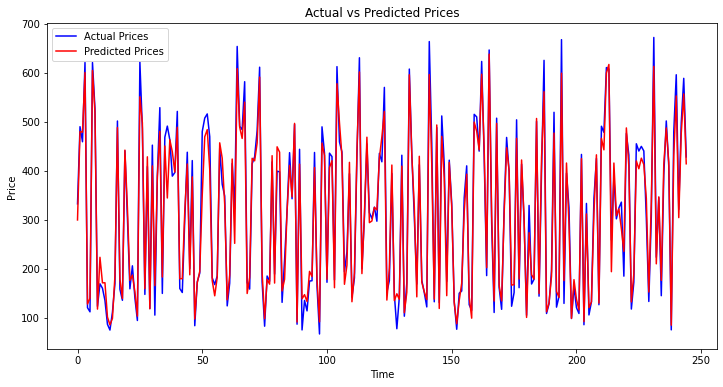

In [24]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [25]:
# Get the most recent data to predict future prices
latest_data = df['Close'][-seq_length:].values.reshape(1, -1, 1)

# Predict the price 'ahead' days in the future
predicted_price = model.predict(latest_data)
predicted_price = scaler.inverse_transform(predicted_price)[0][0]

# Print the predicted price
print(f"Predicted price {ahead} days from today: {predicted_price:.2f}")

Predicted price 10 days from today: 646.75
